In [2]:
import Tasmanian
import numpy as np
import matplotlib.pyplot as plt

# Sparse Grids using Tasmanian

## 1D sparse grid

In [3]:
grid  = Tasmanian.TasmanianSparseGrid()
grid.makeLocalPolynomialGrid(iDimension=1, iOutputs=1, iDepth=4, iOrder=2)
x_train = grid.getPoints()

In [4]:
f = lambda x: np.sin(5*x)
y_train = f(x_train)
grid.loadNeededPoints(y_train)
x_test=np.random.uniform(-1,1,(50,1))
y_test = grid.evaluateBatch(x_test)

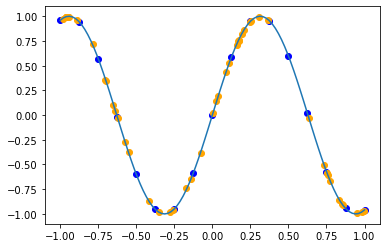

In [5]:
x = np.linspace(-1,1,100)
fig,ax=plt.subplots()
ax.plot(x,f(x))
ax.scatter(x_train,y_train,c='blue')
ax.scatter(x_test,y_test,c='orange')
fig.show()

## 2D Sparse Grid

In [5]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

In [23]:
grid  = Tasmanian.TasmanianSparseGrid()
grid.makeLocalPolynomialGrid(iDimension=2, iOutputs=1, iDepth=4, iOrder=2)
x_train = grid.getNeededPoints()

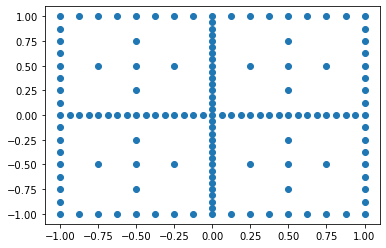

In [22]:
fig,ax=plt.subplots()
ax.scatter(x_train[:,0],x_train[:,1])
fig.show()

In [8]:
def f(x):
    x=np.atleast_2d(x)
    if x.shape[1]==2:
        return np.sin(2*x[:,[0]])*np.cos(5*x[:,[1]])
    else: 
        return np.sin(2*x[0])*np.cos(5*x[1])

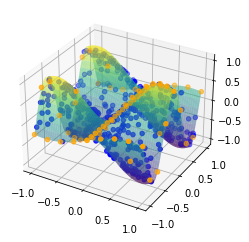

In [9]:
X=np.mgrid[-1:1:50j,-1:1:50j]
Y = f(X)
y_train=f(x_train)
grid.loadNeededPoints(y_train)
n_test = 500
x_test=np.random.uniform(-1,1,(n_test,2))
y_test = grid.evaluateBatch(x_test)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X[0], X[1], Y,alpha=0.5,cmap='viridis')
ax.scatter3D(x_train[:,0],x_train[:,1],y_train,c='orange')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c='blue')
fig.show()

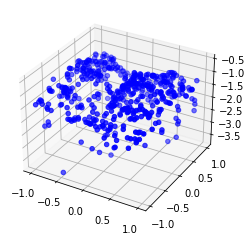

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,0],x_test[:,1],np.log10(np.abs(y_test-f(x_test))),c='blue')
fig.show()

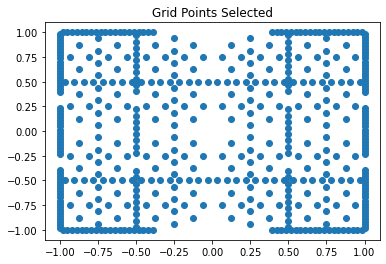

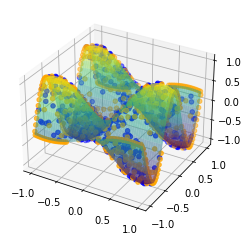

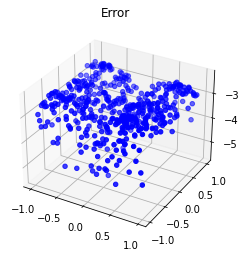

In [37]:
grid  = Tasmanian.TasmanianSparseGrid()
grid.makeLocalPolynomialGrid(iDimension=2, iOutputs=1, iDepth=2, iOrder=1)
x_train = grid.getNeededPoints()
y_train=f(x_train)
grid.loadNeededPoints(y_train)

refinement_level = 6
fTol = 1e-3

for k in range(refinement_level):
    grid.setSurplusRefinement(fTolerance=fTol,iOutput=0, sCriteria="classic")
    x_train = grid.getNeededPoints()
    y_train=f(x_train)
    grid.loadNeededPoints(y_train)
    
fig,ax=plt.subplots()
ax.scatter(x_train[:,0],x_train[:,1])
ax.set(title='Grid Points Selected')
fig.show()

n_test = 500
x_test=np.random.uniform(-1,1,(n_test,2))
y_test = grid.evaluateBatch(x_test)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X[0], X[1], Y,alpha=0.5,cmap='viridis')
ax.scatter3D(x_train[:,0],x_train[:,1],y_train,c='orange')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c='blue')
fig.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,0],x_test[:,1],np.log10(np.abs(y_test-f(x_test))),c='blue')
ax.set(title='Error')
fig.show()

In [38]:
x_train.shape

(504, 2)